# Import Libraries and Data Set

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [16]:
data1 = pd.read_csv("NewspaperData.csv")
data1

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [4]:
data1 = pd.read_csv("NewspaperData.csv")
data1.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


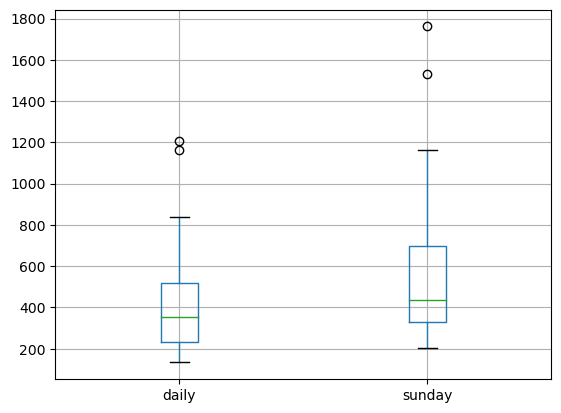

In [5]:
data1.boxplot();


In [6]:
data1.describe();


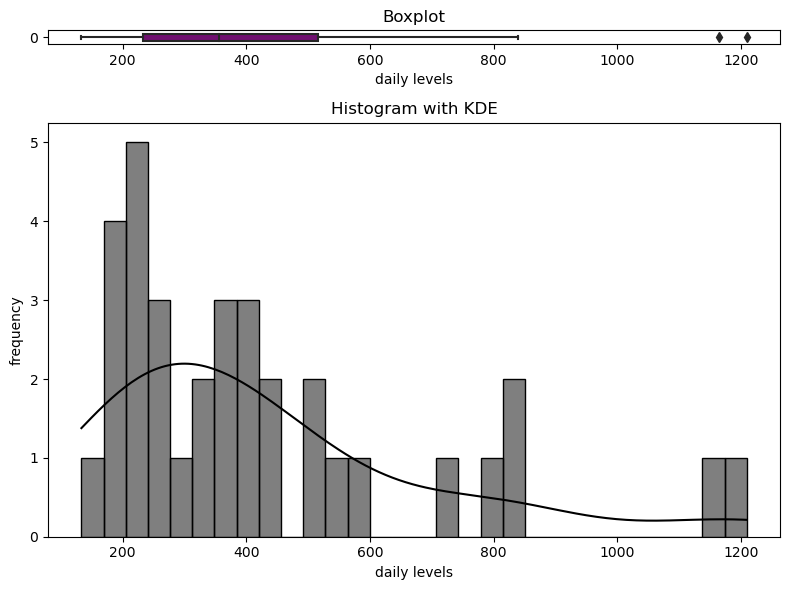

In [7]:
#create a figure with two subplots , staccked vertically
fig,axes = plt.subplots(2,1, figsize=(8,6), gridspec_kw={'height_ratios':  [1,30]})
#plot the boxplot in the first (top) subplot
sns.boxplot(data= data1["daily"], ax=axes[0], color='purple',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("daily levels")

#plot the histogram with KDE curve in the second (bottom) sbuplot
sns.histplot(data1["daily"],kde=True, ax=axes[1],color='black',bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("daily levels")
axes[1].set_ylabel("frequency")

#adjust layout fro better spacing
plt.tight_layout()

#show the plot
plt.show()



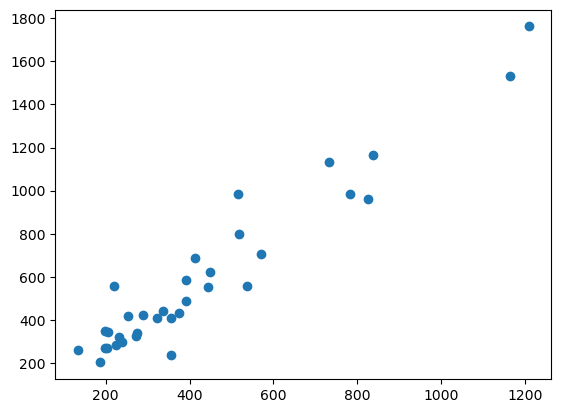

In [19]:
plt.scatter(data1["daily"], data1["sunday"])
plt.show()



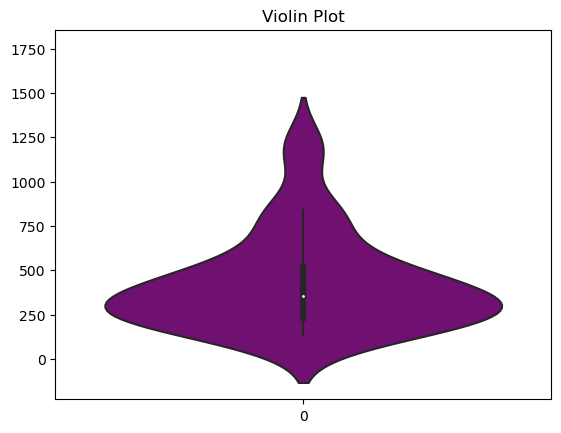

In [9]:
sns.violinplot(data=data1["daily"],color="purple")
plt.title("Violin Plot")
plt.show()


In [10]:
data1["sunday"].describe()

count      34.000000
mean      591.202412
std       376.418051
min       202.614000
25%       327.769500
50%       436.712500
75%       699.735250
max      1762.015000
Name: sunday, dtype: float64

In [11]:
data1["Newspaper"].describe()

count                34
unique               34
top       Baltimore Sun
freq                  1
Name: Newspaper, dtype: object

In [12]:
data1["daily"].describe()

count      34.000000
mean      430.962471
std       269.211470
min       133.239000
25%       233.021500
50%       355.235500
75%       516.616500
max      1209.225000
Name: daily, dtype: float64

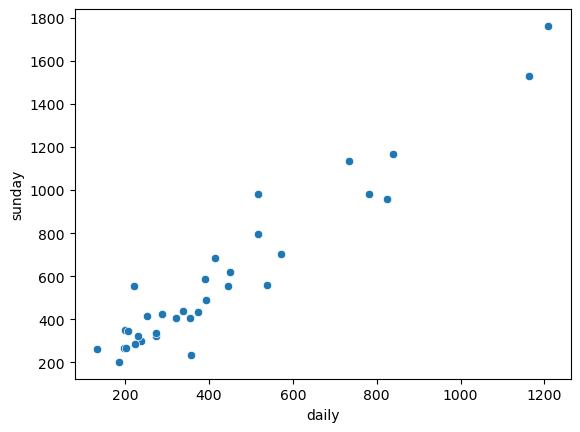

In [13]:
sns.scatterplot(data=data1 , x="daily",y="sunday")
plt.show()

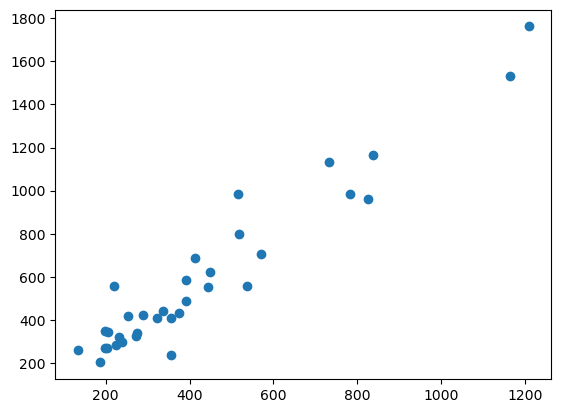

In [14]:
plt.scatter(data1["daily"],data1["sunday"])
plt.show()

In [18]:
data1.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

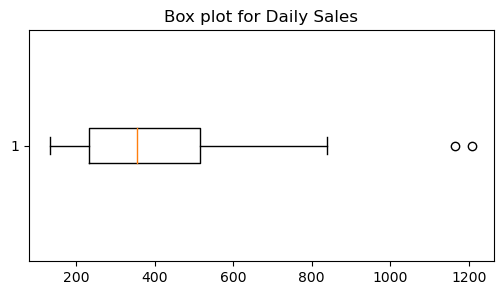

In [22]:
#boxplot for daily col
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data1["daily"],vert =False)
plt.show()

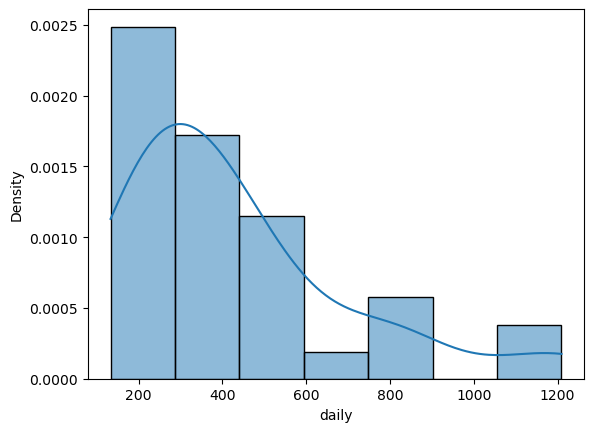

In [23]:
sns.histplot(data1['daily'], kde = True, stat='density',)
plt.show()

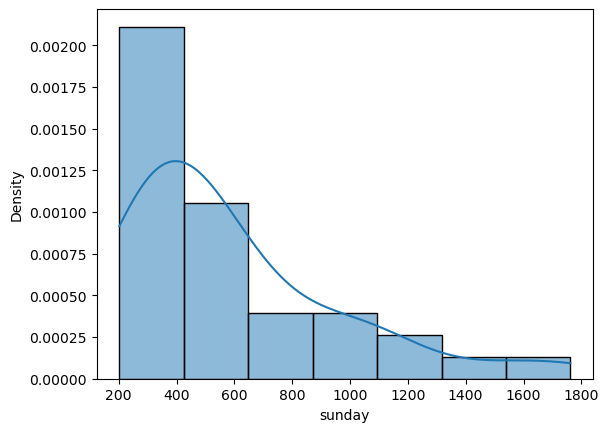

In [24]:
sns.histplot(data1['sunday'], kde =True,stat='density',)
plt.show()

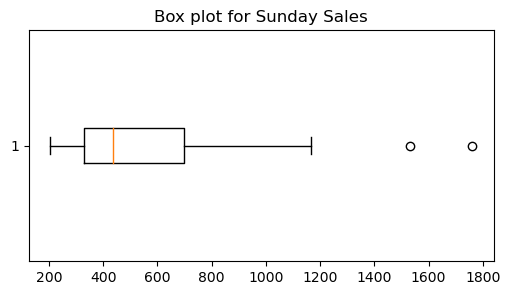

In [25]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Sunday Sales")
plt.boxplot(data1['sunday'], vert=False)
plt.show()

# scatter plot and correlation Strength 

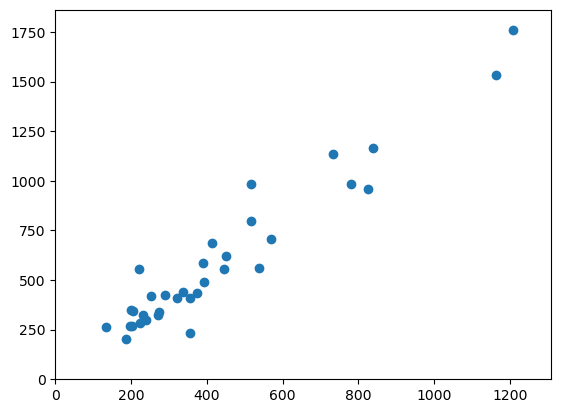

In [27]:
x = data1["daily"]
y = data1["sunday"]
plt.scatter(data1["daily"],data1["sunday"])
plt.xlim(0, max(x) + 100)
plt.ylim(0, max(y) + 100)
plt.show()

In [34]:
data1["daily"].corr(data1["sunday"])


0.9581543140785462

In [30]:
data1[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [31]:
data1.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


# observations on correlation strength

# Fit a Linear Regression Model

In [37]:
#build regression model

import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        12:39:09   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""